 # 1.Data Collection & Description

Read three datasets

In [560]:
import pandas as pd
import numpy as np

In [561]:
data_with_colors1_all = pd.read_csv("DATA-WITH-COLORS.csv", sep=',')

In [562]:
data_with_colors1 = data_with_colors1_all[['N° VO','Energie']] # only 2 columns (fuel types and internal ids)

In [563]:
data_with_colors2_all = pd.read_csv("IMMATS-2017-2018.csv",sep=',',low_memory=False)

In [564]:
data_with_colors2 = data_with_colors2_all[['N° VO','Energie']]  # only 2 columns (fuel types and internal ids)

In [565]:
data_with_colors =pd.concat([data_with_colors1,data_with_colors2]).drop_duplicates() #merge two pricing datasets # column names are in french

In [566]:
data_with_colors    # 1st part of main dataset

,N° VO,Energie
0,561739,Diesel
1,523153,Diesel
2,574621,Diesel
3,523348,Essence
4,610417,Hybride/Autre
...,...,...
64330,564465,Essence
64331,564466,Essence
64332,565891,Diesel
64333,566102,Diesel


In [567]:
data_pricing_2 = pd.read_csv("PRICING-2021-2022.csv", sep=',',low_memory = False) #first part of the pricing dataset

In [568]:
data_pricing_2

,Situation,N° VO,Origine,Marque,Modèle,Code Modèle,Version,Date de Facture,Prix facturé HT hors transport et mise à disposition et forfait entretien,Frais Aval HT,...,Date Immat.,Nb Mois immat.,Nom Client,Canal,Tarif Neuf\nModèle TTC,Tarif Neuf\nOptions TTC,Tarif Neuf TTC\nModèle+Options,Tarif Neuf HT\nModèle+Options,Mois,% / Neuf\nFinal avec FRE (vs prix facturé hors transport et mise à disposition)
0,V1,440508,Flotte RAC,VOLKSWAGEN,POLO (6C1),6C13EV0000-W4B-ALL,POLO (6C1) Allstar 1.2 TSI 90 BMT,12/29/2021,"8,863.33",437.73,...,19/12/2016,60,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"17,810.00","1,315.01","19,125.01","15,937.51",12.0,41.64
1,V1,456758,VD Service VGF,VOLKSWAGEN,E-GOLF,BE23D10000-000-EGO,E-GOLF (BE2) Electrique 136,1/25/2021,"13,508.33","1,533.48",...,10/07/2017,42,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"39,350.00","2,835.00","42,185.00","35,154.17",1.0,57.21
2,V1,456764,VD Service VGF,VOLKSWAGEN,E-GOLF,BE23D10000-000-EGO,E-GOLF (BE2) Electrique 136,1/25/2021,"13,508.33","4,617.40",...,10/07/2017,42,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"39,350.00","2,275.00","41,625.00","34,687.50",1.0,47.75
3,V1,456765,VD Service VGF,VOLKSWAGEN,E-GOLF,BE23D10000-000-EGO,E-GOLF (BE2) Electrique 136,1/25/2021,"13,508.33","3,305.25",...,10/07/2017,42,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"39,350.00","2,275.00","41,625.00","34,687.50",1.0,51.53
4,V1,456876,Flotte RAC,VOLKSWAGEN,POLO (6C1),6C13EV0000-W4B-MA2,POLO (6C1) Match 1.2 TSI 90 BMT,9/7/2021,"9,305.83",208.00,...,29/05/2017,52,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"17,810.00",75.00,"17,885.00","14,904.17",9.0,36.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45371,V1,702380,Divers,VOLKSWAGEN,ID.3,E113MJ0000-000-W4R,ID.3 RANGE 204CH,10/10/2022,"25,592.50",0.00,...,30/12/2020,22,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"45,550.00",0.00,"45,550.00","37,958.33",10.0,32.58
45372,V1,702381,Divers,VOLKSWAGEN,GOLF VIII,CD132X0000-000-LIF,GOLF A8 2.0 TDI 115 CH BVM6 LIFE,10/18/2022,"17,050.00",0.00,...,09/09/2020,25,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,NaN,0.00,NaN,NaN,10.0,0.00
45373,V1,702382,Divers,VOLKSWAGEN UTILITAIRES,TRANSPORTER (T6),SGA1F10000,TRANSPORTER VAN (T6) 2.0 TDI 150,10/10/2022,"5,416.67","6,177.72",...,27/07/2017,63,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"35,472.00",985.20,"36,457.20","30,381.00",10.0,61.84
45374,V1,702383,Divers,SKODA,ENYAQ,5AZFF20000-000-WS0,ENYAQ IV 62KWH,9/26/2022,"35,495.83",419.44,...,10/06/2021,15,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"44,420.00","3,475.01","47,895.01","39,912.51",9.0,10.02


In [569]:
data_pricing_last = pd.read_csv("PRICING-2021-to-Today.csv",sep=',',low_memory=False)

In [570]:
data_pricing_last = data_pricing_last[["N° VO","Desc. Version"]] #get desc version column from this data it is absent in the first

In [571]:
data_pricing_last

,N° VO,Desc. Version
0,486206,(VP/BER/5P/EL/A1/4CV/136Ch)
1,486388,(VU/CHC/2P/DI/M6/7CV/140Ch)
2,486649,(VP/SUV/5P/DI/A8/18CV/287Ch)
3,491990,(VP/SUV/5P/DI/A8/18CV/287Ch)
4,491991,(VP/SUV/5P/DI/A8/18CV/287Ch)
...,...,...
45339,702380,(VP/BER/5P/EL/A1/5CV/204Ch)
45340,702381,(VP/BER/5P/DI/M6/6CV/115Ch)
45341,702382,(VU/FRG/5P/DI/M6/7CV/150Ch)
45342,702383,(VP/SUV/5P/EL/A1/5CV/180Ch)


In [572]:
data_pricing_2022 = data_pricing_2.merge(data_pricing_last, on='N° VO', how='right') # left join of 'dataframe' and 'data_with_colors'  

In [573]:
data_pricing_2022  #2nd part of main dataset

,Situation,N° VO,Origine,Marque,Modèle,Code Modèle,Version,Date de Facture,Prix facturé HT hors transport et mise à disposition et forfait entretien,Frais Aval HT,...,Nb Mois immat.,Nom Client,Canal,Tarif Neuf\nModèle TTC,Tarif Neuf\nOptions TTC,Tarif Neuf TTC\nModèle+Options,Tarif Neuf HT\nModèle+Options,Mois,% / Neuf\nFinal avec FRE (vs prix facturé hors transport et mise à disposition),Desc. Version
0,V1,486206,VD Service VGF,VOLKSWAGEN,E-GOLF,BE23D10000-000-EGO,E-GOLF (BE2) Electrique 136,1/25/2021,"14,404.17","1,150.20",...,33,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"39,560.00",463.01,"40,023.01","33,352.51",1.0,53.36,(VP/BER/5P/EL/A1/4CV/136Ch)
1,V1,486388,VD Service VGF,VOLKSWAGEN UTILITAIRES,CRAFTER,SZCB4A0000-000-BLN,CRAFTER CHASSIS 35 L4 SC TRAC 2.0 TDI 140,2/16/2021,"11,529.34",0.00,...,34,01001599 - MONTPELLIER UTILITAIRES,RESEAU,"40,440.00","1,194.00","41,634.00","34,695.00",2.0,66.77,(VU/CHC/2P/DI/M6/7CV/140Ch)
2,V1,486649,VD Service VGF,VOLKSWAGEN,TOUAREG (CR7),CR74RJ0000-000-KX1,TOUAREG (CR7) Carat Exclusive V6 3.0 TDI 287 BVA,10/25/2021,0.83,52.00,...,26,06001691 - TRACAUTO,MARCHAND,"61,530.00","28,725.01","90,255.01","75,212.51",10.0,99.93,(VP/SUV/5P/DI/A8/18CV/287Ch)
3,V1,491990,VD Service VGF,VOLKSWAGEN,TOUAREG (CR7),CR74RJ0000-000-KX1,TOUAREG (CR7) Carat Exclusive V6 3.0 TDI 287 BVA,10/25/2021,0.83,0.00,...,40,06001691 - TRACAUTO,MARCHAND,"61,530.00","28,510.01","90,040.01","75,033.34",10.0,100.00,(VP/SUV/5P/DI/A8/18CV/287Ch)
4,V1,491991,VD Service VGF,VOLKSWAGEN,TOUAREG (CR7),CR74RJ0000-000-KX1,TOUAREG (CR7) Carat Exclusive V6 3.0 TDI 287 BVA,10/25/2021,0.83,208.00,...,40,06001691 - TRACAUTO,MARCHAND,"61,530.00","28,510.01","90,040.01","75,033.34",10.0,99.72,(VP/SUV/5P/DI/A8/18CV/287Ch)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45347,V1,702380,Divers,VOLKSWAGEN,ID.3,E113MJ0000-000-W4R,ID.3 RANGE 204CH,10/10/2022,"25,592.50",0.00,...,22,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"45,550.00",0.00,"45,550.00","37,958.33",10.0,32.58,(VP/BER/5P/EL/A1/5CV/204Ch)
45348,V1,702381,Divers,VOLKSWAGEN,GOLF VIII,CD132X0000-000-LIF,GOLF A8 2.0 TDI 115 CH BVM6 LIFE,10/18/2022,"17,050.00",0.00,...,25,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,NaN,0.00,NaN,NaN,10.0,0.00,(VP/BER/5P/DI/M6/6CV/115Ch)
45349,V1,702382,Divers,VOLKSWAGEN UTILITAIRES,TRANSPORTER (T6),SGA1F10000,TRANSPORTER VAN (T6) 2.0 TDI 150,10/10/2022,"5,416.67","6,177.72",...,63,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"35,472.00",985.20,"36,457.20","30,381.00",10.0,61.84,(VU/FRG/5P/DI/M6/7CV/150Ch)
45350,V1,702383,Divers,SKODA,ENYAQ,5AZFF20000-000-WS0,ENYAQ IV 62KWH,9/26/2022,"35,495.83",419.44,...,15,06007013 - SAS GUIGNARD ET ASSOCIES,AUTRES,"44,420.00","3,475.01","47,895.01","39,912.51",9.0,10.02,(VP/SUV/5P/EL/A1/5CV/180Ch)


In [574]:
data_pricing_1 = pd.read_csv("PRICING-2019-2020.csv",sep=',',low_memory=False)

merge three datasets to get all information in one dataset

In [575]:
col1 = data_pricing_1.columns 
col2 = data_pricing_2022.columns

In [576]:
common_columns = np.intersect1d(col1,col2) #get columns that exist both in first and second pricing datasets

In [577]:
common_columns

array(['% / Neuf\nFinal avec FRE (vs prix facturé hors transport et mise à disposition)',
       'Canal', 'Code Modèle', 'Date Immat.', 'Date de Facture',
       'Desc. Version', 'Frais Aval HT', 'Frais Déduits HT', 'Km',
       'Marque', 'Modèle', 'Mois', 'Nb Mois immat.', 'Nom Client',
       'N° Châssis 2', 'N° VO', 'Origine',
       'Prix facturé HT hors transport et mise à disposition et forfait entretien ',
       'Px Net HT', 'Situation', 'Tarif Neuf\nModèle TTC',
       'Tarif Neuf\nOptions TTC', 'Tarif Neuf HT\nModèle+Options',
       'Tarif Neuf TTC\nModèle+Options', 'Version'], dtype=object)

In [578]:
data_pricing_1_reduced = data_pricing_1[common_columns] # ommit columns that are not common for the two datasets

In [579]:
dataframe = data_pricing_1_reduced.append(data_pricing_2022) #merge two pricing datasets # column names are in french

Initialization of main dataset

In [580]:
dataframe = dataframe.merge(data_with_colors, on='N° VO', how='left') # left join of 'dataframe' and 'data_with_colors'  

In [581]:
#rename column names, replace them by their english translation
dataframe.rename(columns = {'N° VO':'Internal ID','Origine':'Origin','Marque':'Brand','Modèle':'Model','Code Modèle':'Model Code','Date de Facture':'Date of Sale','Mois':'Month Of Sale','Nom Client':'Client Number','Energie':'Fuel Types','Prix facturé HT hors transport et mise à disposition et forfait entretien':'Sold Price Before Tax','Frais Aval HT':'Refurbishment Costs','Frais Déduits HT':'Refurbishment Costs2','Date Immat.':'Date of Birth','Tarif Neuf TTC\nModèle+Options':'Price With Equipment', 
'% / Neuf\nFinal avec FRE (vs prix facturé hors transport et mise à disposition)':'RV percentage','Nb Mois immat.':'Age In Month','Tarif Neuf\nModèle TTC':'Price Without Equipment','Km':'Car Mileage','Canal':'Channel Sold','Prix facturé HT hors transport et mise à disposition et forfait entretien ':
'Price Before Tax','N° Châssis 2':"Official ID Of Car",'Px Net HT':"Pricing Before Discount",'Tarif Neuf\nOptions TTC': "NC Equipments Price",'Tarif Neuf HT\nModèle+Options':'NC price with equipments (tax excluded)'}, inplace = True)

In [582]:
dataframe.dropna(subset=['Price With Equipment','Pricing Before Discount'],inplace = True)

In [583]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104851 entries, 0 to 105010
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   RV percentage                            104851 non-null  float64
 1   Channel Sold                             104851 non-null  object 
 2   Model Code                               104851 non-null  object 
 3   Date of Birth                            104851 non-null  object 
 4   Date of Sale                             104851 non-null  object 
 5   Desc. Version                            104851 non-null  object 
 6   Refurbishment Costs                      104851 non-null  object 
 7   Refurbishment Costs2                     104851 non-null  float64
 8   Car Mileage                              104851 non-null  int64  
 9   Brand                                    104851 non-null  object 
 10  Model                           

In [584]:
dataframe.describe()

,RV percentage,Refurbishment Costs2,Car Mileage,Month Of Sale,Age In Month,Internal ID,Pricing Before Discount
count,104851.000000,104851.000000,104851.000000,104851.000000,104851.000000,104851.000000,104851.000000
mean,29.251234,233.111558,13157.741404,6.616875,9.191729,572994.903787,21445.110021
std,6.811376,465.241663,6953.150186,3.419979,3.534951,53199.078958,8517.879790
min,-80.590000,0.000000,0.000000,1.000000,0.000000,360907.000000,-31415.470000
25%,25.100000,0.000000,8515.000000,3.000000,7.000000,527470.500000,15311.665000
50%,28.530000,119.000000,12551.000000,7.000000,9.000000,567678.000000,19542.210000
75%,32.650000,309.000000,17234.000000,10.000000,10.000000,621733.500000,25869.380000
max,100.000000,70712.000000,580446.000000,12.000000,238.000000,702504.000000,129963.020000


In [585]:
dataframe =dataframe.dropna(subset=['Price With Equipment']).reset_index(drop=True)

'Car Mileage' feature and corresponding 'RV percentage' feature.

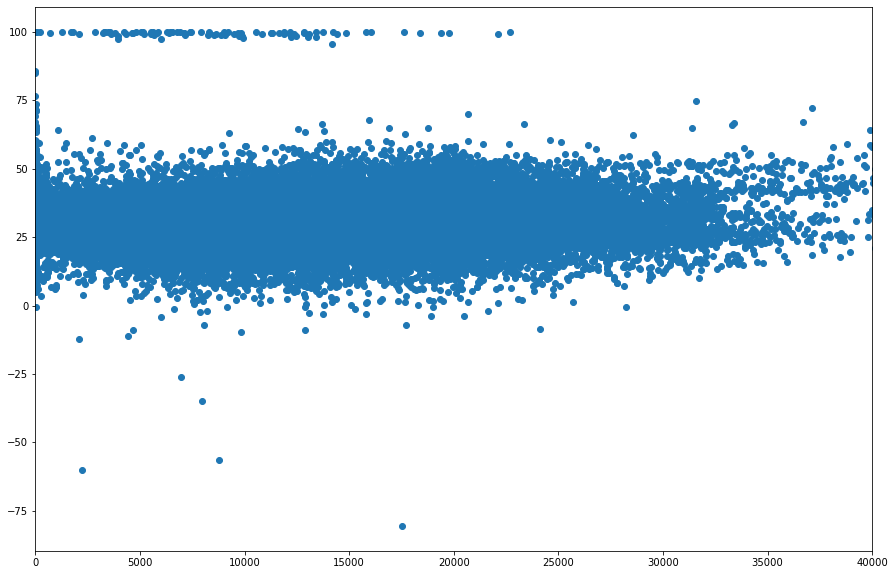

In [586]:
import matplotlib.pyplot as plt

# initializing the data
x = dataframe["Car Mileage"]
y = dataframe["RV percentage"]
plt.xlim([0,40000])
plt.rcParams["figure.figsize"] = (10,8)
# plotting the data
plt.scatter(x,y)

plt.show()


In [587]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104851 entries, 0 to 104850
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   RV percentage                            104851 non-null  float64
 1   Channel Sold                             104851 non-null  object 
 2   Model Code                               104851 non-null  object 
 3   Date of Birth                            104851 non-null  object 
 4   Date of Sale                             104851 non-null  object 
 5   Desc. Version                            104851 non-null  object 
 6   Refurbishment Costs                      104851 non-null  object 
 7   Refurbishment Costs2                     104851 non-null  float64
 8   Car Mileage                              104851 non-null  int64  
 9   Brand                                    104851 non-null  object 
 10  Model                           

# 2.  Data Preparation 


Functions for preprocessing Versions column

In [588]:
dataframe['Engine Power'] = dataframe['Desc. Version'].apply(lambda x: x.split('/')[-1][:-3])

In [589]:
dataframe['Version'] = dataframe['Version'].apply(lambda x: x.split(' '))

In [590]:
def create_col(list_of_strings):
    num = [float(element.replace("(","",1).replace("TDI","",1).replace("TFSI","",1).replace("(5F8)","",1)) for element in list_of_strings if element.replace('.', '', 1).replace("(","",1).replace("TDI","",1).replace("TFSI","",1).replace("(5F8)","",1).isdigit()]
    if len(num)==0:
        return np.nan
    if min(num) < 10:
        return min(num)
    return np.nan

In [591]:
dataframe['Engine Capacity'] = dataframe['Version'].apply(create_col)

In [592]:
dataframe[['Version','Engine Capacity','Engine Power']]

,Version,Engine Capacity,Engine Power
0,"[SUPERB, III, (3V3), Style, 2.0, TDI, 190, Gre...",2.0,190
1,"[A8, L, (4HL), V6, 3.0, TDI, 262, quattro, Avu...",3.0,262
2,"[A8, L, (4HL), V6, 3.0, TDI, 262, quattro, Avu...",3.0,262
3,"[A8, (4HC), V8, 4.2, TDI, 385, quattro, Avus, ...",4.2,385
4,"[A8, (4HC), V6, 3.0, TDI, 262, Avus, Quattro, ...",3.0,262
...,...,...,...
104846,"[OCTAVIA, COMBI, RS, 2.0, TDI, 200, DSG7]",2.0,200
104847,"[ID.3, RANGE, 204CH]",NaN,204
104848,"[TRANSPORTER, VAN, (T6), 2.0, TDI, 150]",2.0,150
104849,"[ENYAQ, IV, 62KWH]",NaN,180


In [593]:
capacity_nan = dataframe.loc[dataframe['Engine Capacity'].isna()]

In [594]:
capacity_nan.loc[capacity_nan['Fuel Types'] =='Electrique','Engine Capacity'] = float('10')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [595]:
dataframe.loc[dataframe['Engine Capacity'].isna()]=capacity_nan

In [596]:
dataframe.iloc[5:,5:]

,Desc. Version,Refurbishment Costs,Refurbishment Costs2,Car Mileage,Brand,Model,Month Of Sale,Age In Month,Client Number,Official ID Of Car,...,Pricing Before Discount,Situation,Price Without Equipment,NC Equipments Price,NC price with equipments (tax excluded),Price With Equipment,Version,Fuel Types,Engine Power,Engine Capacity
5,(VP/SUV/5P/DI/M6/8CV/150Ch),316.54,205.0,12,VOLKSWAGEN,TIGUAN (AD1),11.0,40,01003593 - GVA BYMYCAR VAUCLUSE.,WVGZZZ5NZGW310734,...,19923.52,V1,"35,150.00","1,630.00","30,650.00","36,780.00","[TIGUAN, (AD1), Confortline, 2.0, TDI, 150]",NaN,150,2.0
6,(VP/BER/4P/DI/A8/16CV/262Ch),333.20,218.0,13708,AUDI,A8,1.0,29,01005120 - QUANTIUM BY AUTOSPHERE,WAUZZZ4HXHN001640,...,47830.87,V1,"103,160.00","4,985.00","90,120.83","108,145.00","[A8, (4HC), V6, 3.0, TDI, 262, Avus, Quattro, ...",NaN,262,3.0
7,(VP/BER/4P/DI/A8/16CV/262Ch),170.00,55.0,13796,AUDI,A8,1.0,28,01000968 - RAVON AUTOMOBILE,WAUZZZ4H5HN001805,...,48906.52,V1,"103,160.00","4,985.00","90,120.83","108,145.00","[A8, (4HC), V6, 3.0, TDI, 262, Avus, Quattro, ...",NaN,262,3.0
8,(VP/SUV/5P/DI/A7/14CV/240Ch),136.50,24.0,10966,VOLKSWAGEN,TIGUAN (AD1),6.0,31,01008623 - GARAGE PERRIER,WVGZZZ5NZHW837964,...,31405.21,V1,"44,975.00","11,540.00","47,095.83","56,515.00","[TIGUAN, (AD1), Carat, Ed., 2.0, Bi-TDI, 240, ...",NaN,240,2.0
9,(VP/BER/4P/DI/A8/21CV/313Ch),0.00,0.0,17750,AUDI,A7 SB,2.0,25,06007099 - AXA CORPORATE SOLUTION,WAUZZZ4G3HN053814,...,49368.56,V1,"86,790.00","15,125.00","84,929.17","101,915.00","[A7, SB, (4GF), V6, 3.0, BiTDI, 320, Quattro, ...",Diesel,313,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104846,(VP/BRK/5P/DI/A7/8CV/200Ch),0.00,0.0,1,SKODA,OCTAVIA COMBI,10.0,8,06007013 - SAS GUIGNARD ET ASSOCIES,TMBJK8NX0NY024438,...,31166.67,V1,"41,290.00",350.00,"34,700.00","41,640.00","[OCTAVIA, COMBI, RS, 2.0, TDI, 200, DSG7]",Diesel,200,2.0
104847,(VP/BER/5P/EL/A1/5CV/204Ch),0.00,0.0,14016,VOLKSWAGEN,ID.3,10.0,22,06007013 - SAS GUIGNARD ET ASSOCIES,WVWZZZE1ZMP027265,...,28208.33,V1,"45,550.00",0.00,"37,958.33","45,550.00","[ID.3, RANGE, 204CH]",Electrique,204,10.0
104848,(VU/FRG/5P/DI/M6/7CV/150Ch),"6,177.72",6066.0,89401,VOLKSWAGEN UTILITAIRES,TRANSPORTER (T6),10.0,63,06007013 - SAS GUIGNARD ET ASSOCIES,WV1ZZZ7HZHH080600,...,2465.01,V1,"35,472.00",985.20,"30,381.00","36,457.20","[TRANSPORTER, VAN, (T6), 2.0, TDI, 150]",NaN,150,2.0
104849,(VP/SUV/5P/EL/A1/5CV/180Ch),419.44,0.0,179,SKODA,ENYAQ,9.0,15,06007013 - SAS GUIGNARD ET ASSOCIES,TMBJB7NY2MF025927,...,32970.83,V1,"44,420.00","3,475.01","39,912.51","47,895.01","[ENYAQ, IV, 62KWH]",Electrique,180,10.0


In [597]:
dataframe['Engine Power'].replace('61', '83', inplace=True)
dataframe['Four Wheel']=dataframe['Version'].str.extract(pat ='(4+[A-Z]\w{0,})', expand = True) #extract four wheel feature from version column
dataframe.loc[dataframe['Brand'] == 'AUDI','Four Wheel'] = 'Quattro' #'Four Wheel' column of 'Audi' brand cars data initialize with 'Quattro' value

manually create new 'gearbox' column based on 'version' column

In [598]:
#BVA, DSG - automatic,tronic- automatic,electric - automatic,BVM- manual, if nothing = manual

In [599]:
#versions_split = [value.split(' ') for  value in dataframe['Version'].values]
target_values = ["BVA","DSG","TRONIC",'BVM']
def DetectType(version_sample):
    answer = [target for target in target_values for element in version_sample if target in element.upper()]
    if len(answer):
        return answer[0]
    else:
        return np.nan
type_detecting =  list(map(DetectType, dataframe['Version'].values))

In [600]:
dataframe['Gearbox'] = type_detecting

In [601]:
dataframe['Gearbox'].replace({"BVA":"Automatic","DSG":"Automatic","TRONIC":"Automatic",'BVM':"Manual",np.nan:"Manual"},inplace=True)

In [602]:
dataframe.loc[dataframe['Fuel Types'] =='Electrique','Gearbox'] = 'Automatic'

In [603]:
#change gearbox value to 'Automatique' in all the columns that have model type 'TOUAREG'
dataframe.loc[dataframe['Model'].isin(['TOUAREG','TOUAREG (7P6)','TOUAREG (CR7)']),'Gearbox'] = 'Automatic'

 Change dtype of numeric features ( object to float)

In [604]:
def ConvertObjectToFloat(column_name): 
    
    """there are commas at price values, and dtype=object, function takes that column name as argument,
        deletes commas from numbers, and changes datatype """
    
    dataframe[column_name] = dataframe[column_name].apply(lambda x: str(x).replace(',',""))
    dataframe[column_name] = dataframe[column_name].astype(float)

In [605]:
val = [ConvertObjectToFloat(column_name) for column_name in ['Refurbishment Costs', 'Price Before Tax','Price Without Equipment','Engine Power', 'Price With Equipment']]

In [606]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104851 entries, 0 to 104850
Data columns (total 30 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   RV percentage                            104851 non-null  float64
 1   Channel Sold                             104851 non-null  object 
 2   Model Code                               104851 non-null  object 
 3   Date of Birth                            104851 non-null  object 
 4   Date of Sale                             104851 non-null  object 
 5   Desc. Version                            104851 non-null  object 
 6   Refurbishment Costs                      104851 non-null  float64
 7   Refurbishment Costs2                     104851 non-null  float64
 8   Car Mileage                              104851 non-null  int64  
 9   Brand                                    104851 non-null  object 
 10  Model                           

In [607]:
val = [ConvertObjectToFloat(column_name) for column_name in ['NC Equipments Price', 'NC price with equipments (tax excluded)']]

binary encoding for 'Four wheel' column, 0 if it is NaN, 1 otherwise

In [608]:
dataframe['Four Wheel'] = dataframe['Four Wheel'].fillna(0)

In [609]:
filter_ = dataframe['Four Wheel'] == 0 

In [610]:
dataframe['Four Wheel'] = dataframe['Four Wheel'].where(filter_).fillna(1)

 get new columns from combination of existing columns

In [611]:
dataframe['Date of Sale'] = pd.to_datetime(dataframe['Date of Sale'], errors='coerce')
dataframe['Date of Birth'] = pd.to_datetime(dataframe['Date of Birth'], errors='coerce')

In [612]:
dataframe['Age of vehicle'] = dataframe['Date of Sale'].dt.to_period('M').astype(int) - dataframe['Date of Birth'].dt.to_period('M').astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_15852\4131248184.py:1: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  dataframe['Age of vehicle'] = dataframe['Date of Sale'].dt.to_period('M').astype(int) - dataframe['Date of Birth'].dt.to_period('M').astype(int)


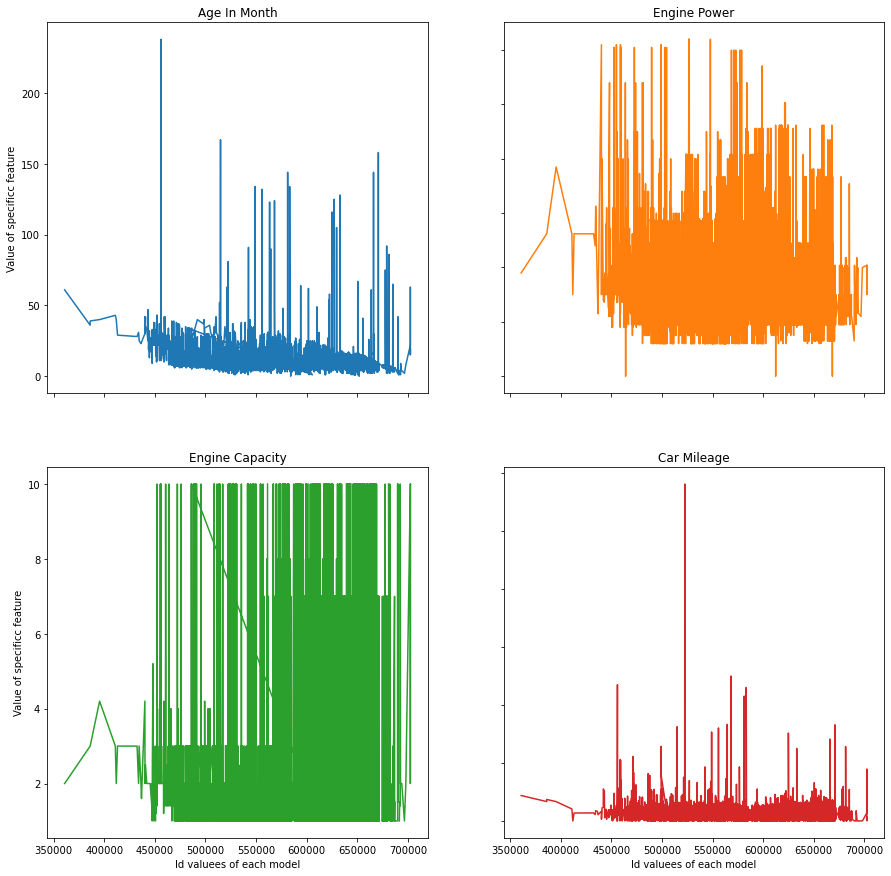

In [613]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].plot(dataframe['Internal ID'], dataframe['Age In Month'])
axs[0, 0].set_title('Age In Month')
axs[0, 1].plot(dataframe['Internal ID'], dataframe['Engine Power'], 'tab:orange')
axs[0, 1].set_title('Engine Power')
axs[1, 0].plot(dataframe['Internal ID'], dataframe['Engine Capacity'], 'tab:green')
axs[1, 0].set_title('Engine Capacity')
axs[1, 1].plot(dataframe['Internal ID'], dataframe['Car Mileage'], 'tab:red')
axs[1, 1].set_title('Car Mileage')
for ax in axs.flat:
    ax.set(xlabel='Id valuees of each model', ylabel='Value of specificc feature')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Analize data and preprocess missing values

get all possible values of each column and analize how many samples have Nan value in that column

In [614]:
dataframe.info()  #100620 non nal in df engine power

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104851 entries, 0 to 104850
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   RV percentage                            104851 non-null  float64       
 1   Channel Sold                             104851 non-null  object        
 2   Model Code                               104851 non-null  object        
 3   Date of Birth                            104851 non-null  datetime64[ns]
 4   Date of Sale                             104851 non-null  datetime64[ns]
 5   Desc. Version                            104851 non-null  object        
 6   Refurbishment Costs                      104851 non-null  float64       
 7   Refurbishment Costs2                     104851 non-null  float64       
 8   Car Mileage                              104851 non-null  int64         
 9   Brand                     

 get new column 'brand model', this column will be used for data imputation

In [615]:
 dataframe["Brand Model"] = dataframe['Brand'] + " " + dataframe['Model'] #create new column that will be indicator

get mean values by 'brand' and 'brand model' columns

In [616]:
# group by brand (mean values) this values will be default if the value for 'brand model' is empty
mean_values_all = dataframe.groupby(by="Brand").mean()
mean_values_brand = mean_values_all[['Engine Capacity']]
mean_values_brand

,Engine Capacity
Brand,
AUDI,2.633171
SEAT,1.306751
SKODA,1.514516
VOLKSWAGEN,1.420760
VOLKSWAGEN UTILITAIRES,2.057629


Mean values of features for each brand

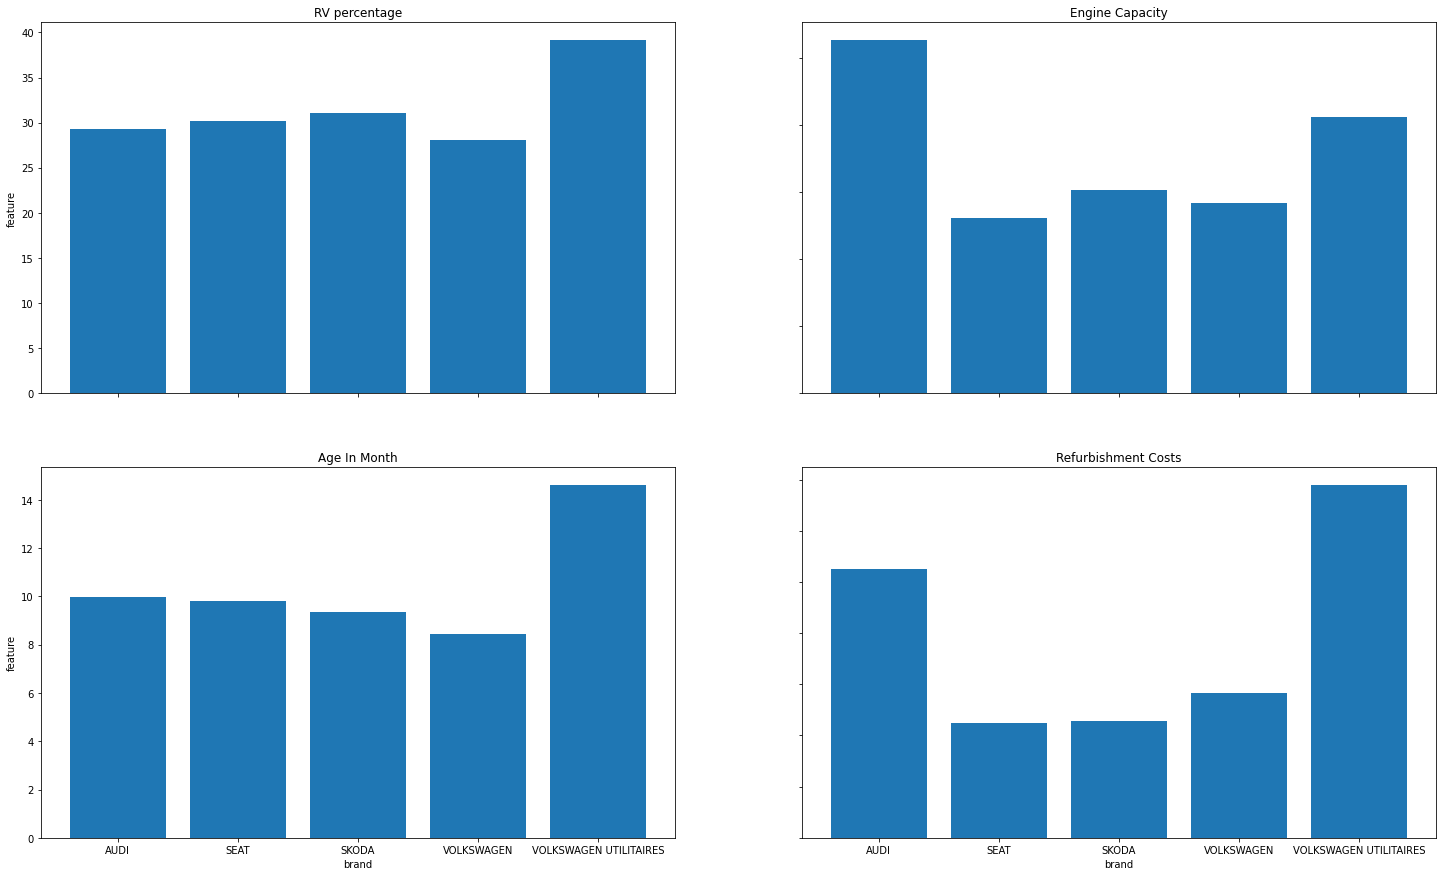

In [617]:
fig, axs = plt.subplots(2, 2,figsize=(25, 15))
axs[0, 0].bar(mean_values_all.index, mean_values_all['RV percentage'])
axs[0, 0].set_title('RV percentage')

axs[0, 1].bar(mean_values_all.index, mean_values_all['Engine Capacity'])
axs[0, 1].set_title('Engine Capacity')
axs[1, 0].bar(mean_values_all.index, mean_values_all['Age In Month'])
axs[1, 0].set_title('Age In Month')
axs[1, 1].bar(mean_values_all.index, mean_values_all['Refurbishment Costs'])
axs[1, 1].set_title('Refurbishment Costs')


for ax in axs.flat:
    ax.set(xlabel='brand', ylabel='feature')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [618]:
#group by brand model, this will help us to impute missing values
mean_values_cols = dataframe.groupby(by="Brand Model").mean()
mean_values = mean_values_cols[['Engine Capacity']]
#Emean_values_price = mean_values[['Price Without Equipment']]

# Statistical descriptions for each brand value

In [619]:
brand_group =  dataframe.groupby(by="Brand")


In [620]:
brand_group1 = brand_group[['Age of vehicle','Car Mileage']]

In [621]:
brand_group2 = brand_group[['Engine Capacity','Engine Power']]

In [622]:
brand_group1.describe()

Age of vehicle                                        \
                                count       mean       std  min   25%   50%   
Brand                                                                         
AUDI                          19126.0  10.102478  4.975953 -4.0   8.0  10.0   
SEAT                          16554.0   9.536124  3.727932 -4.0   8.0   9.0   
SKODA                         13978.0   9.352125  3.887880 -5.0   8.0   9.0   
VOLKSWAGEN                    52951.0   8.269268  4.077578 -7.0   7.0   8.0   
VOLKSWAGEN UTILITAIRES         2242.0  14.401873  6.474021 -7.0  10.0  14.0   

                                    Car Mileage                              \
                         75%    max       count          mean           std   
Brand                                                                         
AUDI                    12.0  243.0     19126.0  15084.069591   8211.576417   
SEAT                    12.0  111.0     16554.0  11887.600882   5683.265585   
SKODA                   11.0  125.0     13978.0  12055.678924   5861.446870   
VOLKSWAGEN              10.0  153.0     52951.0  12843.285774   6157.075371   
VOLKSWAGEN UTILITAIRES  18.0   63.0      2242.0  20400.525870  15230.526196   

                                                                    
                        min       25%      50%       75%       max  
Brand                                                               
AUDI                    0.0  10304.00  15213.5  19567.00  580446.0  
SEAT                    0.0   7692.25  11277.0  15451.75  129708.0  
SKODA                   1.0   7618.25  11437.5  15829.25   57143.0  
VOLKSWAGEN              1.0   8584.50  12370.0  16688.00  249748.0  
VOLKSWAGEN UTILITAIRES  1.0   8752.50  18214.0  29043.75  128551.0

In [623]:
brand_group2.describe()

Engine Capacity                                     \
                                 count      mean       std  min  25%  50%   
Brand                                                                       
AUDI                           16602.0  2.633171  2.063375  1.0  1.5  2.0   
SEAT                           16295.0  1.306751  0.528759  1.0  1.0  1.0   
SKODA                          13978.0  1.514516  0.843008  1.0  1.0  1.5   
VOLKSWAGEN                     51892.0  1.420760  0.881701  1.0  1.0  1.0   
VOLKSWAGEN UTILITAIRES          2176.0  2.057629  0.762143  1.0  2.0  2.0   

                                  Engine Power                               \
                        75%   max        count        mean        std   min   
Brand                                                                         
AUDI                    2.0  10.0      19126.0  161.071578  54.980686   0.0   
SEAT                    1.5  10.0      16554.0  122.201945  33.407277  60.0   
SKODA                   2.0  10.0      13978.0  128.796037  32.162620  60.0   
VOLKSWAGEN              1.6  10.0      52951.0  121.050481  30.934017   0.0   
VOLKSWAGEN UTILITAIRES  2.0  10.0       2242.0  134.361285  36.169511  75.0   

                                                    
                          25%    50%    75%    max  
Brand                                               
AUDI                    125.0  150.0  163.0  620.0  
SEAT                     95.0  115.0  150.0  310.0  
SKODA                   110.0  116.0  150.0  280.0  
VOLKSWAGEN               95.0  115.0  150.0  462.0  
VOLKSWAGEN UTILITAIRES  102.0  140.0  150.0  258.0

In [624]:
# group by brand model coulmn to get more accurate imputation
mean_dict = mean_values.to_dict() #dict for groups 'brand model'
mean_dict_brand = mean_values_brand.to_dict()  #dict for 'brand' groups

In [625]:
#if mean values for 'brand model' column is empty fill them with their values of 'brand' column
def FillDict(column_name):
    mean_dict_col = mean_values[column_name].to_dict() #dict for groups vehicle
    mean_dict_brand_col = mean_values_brand[column_name].to_dict() 
    nan_groups = [key for key, value in mean_dict_col.items() if str(value) == 'nan']
    for key in nan_groups:
        mean_dict[column_name][key] = mean_dict_brand_col[key.split(' ')[0]]

In [626]:
list(map(FillDict,list(mean_dict.keys()))) #apply function to ['Engine Capacity'] column

[None]

 Fill dataframe missing values using these dictionaries

In [627]:
def InputWithMeans(col_name):
    nan_rows  =  dataframe.loc[dataframe[col_name].isna()]
    mean_col_dict = mean_dict[col_name]
    new_col_values = [mean_col_dict[key] for key in list(nan_rows['Brand Model'].values)]
    dataframe.loc[dataframe[col_name].isna(),col_name] = new_col_values
    

In [628]:
InputWithMeans('Engine Capacity')

Prepare data and encode categorical values to numerical for model
(with one hot encoding)


Normalize columns and give them values in range [0,1]

In [629]:
def encoding(feature):
    shape_ =len( set(dataframe[feature].values))
    encoding = np.linspace(1,0,shape_)
    mappings = dict(zip(dataframe[feature].unique(), encoding))
    dataframe[feature] = dataframe[feature].map(mappings)

In [630]:
list(map(encoding,['Origin','Model','Client Number','Gearbox', 'Brand','Fuel Types','Channel Sold']))

[None, None, None, None, None, None, None]

In [631]:
# Min max scaling of 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataframe[[ 'Engine Capacity', 'Engine Power','Price Without Equipment','Car Mileage', 'Refurbishment Costs','Price Before Tax', 'Price With Equipment','Age of vehicle']] = scaler.fit_transform(dataframe[[ 'Engine Capacity', 'Engine Power','Price Without Equipment','Car Mileage', 'Refurbishment Costs','Price Before Tax', 'Price With Equipment','Age of vehicle']])

In [632]:
dataframe[[ "Refurbishment Costs2","NC Equipments Price","NC price with equipments (tax excluded)"]] = scaler.fit_transform(dataframe[[ "Refurbishment Costs2","NC Equipments Price","NC price with equipments (tax excluded)"]])

In [633]:
dataframe['Situation'].replace({'V0':0,'V1':1,},inplace=True)

In [634]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104851 entries, 0 to 104850
Data columns (total 32 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   RV percentage                            104851 non-null  float64       
 1   Channel Sold                             104851 non-null  float64       
 2   Model Code                               104851 non-null  object        
 3   Date of Birth                            104851 non-null  datetime64[ns]
 4   Date of Sale                             104851 non-null  datetime64[ns]
 5   Desc. Version                            104851 non-null  object        
 6   Refurbishment Costs                      104851 non-null  float64       
 7   Refurbishment Costs2                     104851 non-null  float64       
 8   Car Mileage                              104851 non-null  float64       
 9   Brand                     

In [635]:
dataframe = dataframe.dropna()

# 3. Feature Selection 


In [636]:
dataframe.drop(columns = ['Version'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [637]:
dataframe.drop(columns = ['Brand Model'], axis=1, inplace=True)

In [638]:
dataframe.drop(columns = ['Date of Sale','Date of Birth','Age In Month','Month Of Sale'], axis=1, inplace=True)

In [639]:
dataframe.drop(columns = ['Desc. Version'],inplace=True)
dataframe.drop(columns = ['Model Code'],inplace=True)  


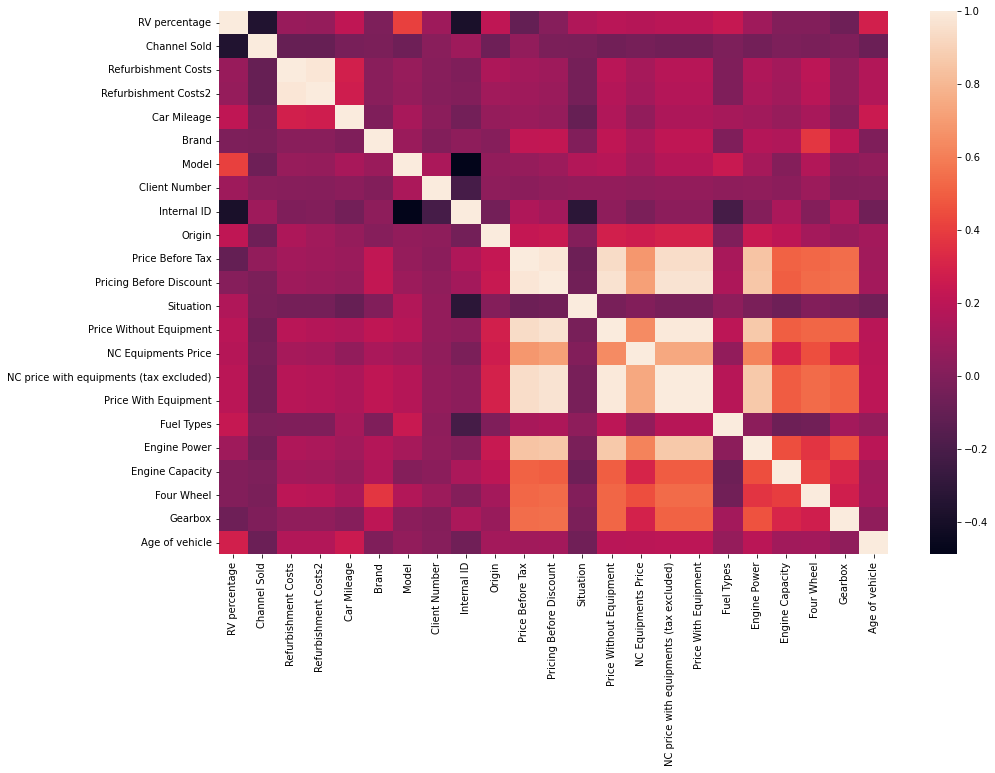

In [640]:
#Calculate and Visualize a Pandas Correlation Matrix Using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = dataframe.corr()
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(correlation_matrix, annot=False)
plt.show()

In [641]:
#correlation matrix of independant variables
corr = dataframe.corr()
corr

,RV percentage,Channel Sold,Refurbishment Costs,Refurbishment Costs2,Car Mileage,Brand,Model,Client Number,Internal ID,Origin,...,Price Without Equipment,NC Equipments Price,NC price with equipments (tax excluded),Price With Equipment,Fuel Types,Engine Power,Engine Capacity,Four Wheel,Gearbox,Age of vehicle
RV percentage,1.000000,-0.358839,0.075591,0.067843,0.212288,-0.014044,0.407978,0.094730,-0.390737,0.210477,...,0.186217,0.178863,0.195282,0.195282,0.237403,0.100352,0.000516,0.002239,-0.067013,0.281127
Channel Sold,-0.358839,1.000000,-0.097191,-0.098412,-0.032118,-0.018464,-0.070262,0.026012,0.094292,-0.070690,...,-0.055915,-0.040548,-0.056228,-0.056228,-0.017972,-0.052312,-0.015703,-0.026285,-0.008245,-0.077038
Refurbishment Costs,0.075591,-0.097191,1.000000,0.980807,0.284197,0.026563,0.074646,0.020635,-0.006926,0.148387,...,0.186416,0.121624,0.184978,0.184978,-0.010593,0.155064,0.114345,0.199460,0.051352,0.167631
Refurbishment Costs2,0.067843,-0.098412,0.980807,1.000000,0.268414,0.023669,0.067785,0.016512,-0.000437,0.106097,...,0.172362,0.109889,0.170562,0.170562,-0.009747,0.144124,0.106849,0.189059,0.049093,0.162828
Car Mileage,0.212288,-0.032118,0.284197,0.268414,1.000000,-0.007843,0.132573,0.028458,-0.051666,0.063308,...,0.157328,0.054049,0.147219,0.147219,0.122547,0.106947,0.069330,0.130862,0.015928,0.254347
Brand,-0.014044,-0.018464,0.026563,0.023669,-0.007843,1.000000,0.081679,0.003562,0.042264,0.010953,...,0.213360,0.133211,0.210617,0.210617,-0.008547,0.169482,0.160184,0.374768,0.204664,-0.009716
Model,0.407978,-0.070262,0.074646,0.067785,0.132573,0.081679,1.000000,0.139020,-0.489744,0.056276,...,0.180431,0.106942,0.177066,0.177066,0.247421,0.123256,0.009244,0.167153,0.033563,0.056283
Client Number,0.094730,0.026012,0.020635,0.016512,0.028458,0.003562,0.139020,1.000000,-0.212821,0.040191,...,0.059792,0.050827,0.061494,0.061494,0.045522,0.050291,0.030300,0.090349,0.008446,0.016221
Internal ID,-0.390737,0.094292,-0.006926,-0.000437,-0.051666,0.042264,-0.489744,-0.212821,1.000000,-0.052230,...,0.043854,-0.018801,0.034837,0.034837,-0.221567,0.009489,0.141186,0.010088,0.139559,-0.061983
Origin,0.210477,-0.070690,0.148387,0.106097,0.063308,0.010953,0.056276,0.040191,-0.052230,1.000000,...,0.279295,0.263362,0.291993,0.291993,-0.008368,0.240714,0.204811,0.116909,0.078922,0.110467


In [642]:
dataframe.columns

Index(['RV percentage', 'Channel Sold', 'Refurbishment Costs',
       'Refurbishment Costs2', 'Car Mileage', 'Brand', 'Model',
       'Client Number', 'Official ID Of Car', 'Internal ID', 'Origin',
       'Price Before Tax', 'Pricing Before Discount', 'Situation',
       'Price Without Equipment', 'NC Equipments Price',
       'NC price with equipments (tax excluded)', 'Price With Equipment',
       'Fuel Types', 'Engine Power', 'Engine Capacity', 'Four Wheel',
       'Gearbox', 'Age of vehicle'],
      dtype='object')

In [643]:
#this columns have large correlations with some of columns, resarch andcorrelation matrix indicate that these features
#don't have any influence on variance and they repeate information that contain some columns.That is why we drop them.
dataframe.drop(columns = ['Refurbishment Costs2', 'Official ID Of Car','NC price with equipments (tax excluded)'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [644]:
#These columns have small correlation with target column
dataframe.drop(columns = ['Client Number', 'Pricing Before Discount'], axis=1, inplace=True)

#                                                    4. Machine Learning Modeling & Comparison

# Train test split

In [645]:
from sklearn.model_selection import train_test_split

In [646]:
dataframe

,RV percentage,Channel Sold,Refurbishment Costs,Car Mileage,Brand,Model,Internal ID,Origin,Price Before Tax,Situation,Price Without Equipment,NC Equipments Price,Price With Equipment,Fuel Types,Engine Power,Engine Capacity,Four Wheel,Gearbox,Age of vehicle
0,65.69,1.000000,0.012439,0.075497,1.00,1.00000,360907,1.00,0.076744,1,0.132821,0.210613,0.134051,1.000000,0.306452,0.111111,0,1.0,0.272
1,66.65,1.000000,0.045853,0.057497,0.75,0.99375,386135,1.00,0.222085,1,0.483823,0.374224,0.491338,1.000000,0.422581,0.222222,1,0.0,0.152
2,72.24,0.666667,0.019413,0.063915,0.75,0.99375,386137,1.00,0.204937,1,0.483823,0.495746,0.519561,1.000000,0.422581,0.222222,1,0.0,0.164
3,65.91,1.000000,0.026425,0.057347,0.75,0.99375,395468,1.00,0.248970,1,0.546573,0.236634,0.516465,1.000000,0.620968,0.355556,1,1.0,0.188
4,70.18,0.666667,0.005423,0.035642,0.75,0.99375,410998,0.75,0.187971,1,0.436643,0.263328,0.422667,1.000000,0.422581,0.222222,1,1.0,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104846,16.22,0.666667,0.000000,0.000002,1.00,0.25625,697926,0.00,0.203874,1,0.148205,0.155467,0.135239,0.833333,0.322581,0.111111,0,1.0,0.060
104847,32.58,0.666667,0.000000,0.024147,0.50,0.16250,702380,0.00,0.179485,1,0.168065,0.149076,0.151820,0.333333,0.329032,1.000000,0,1.0,0.116
104848,61.84,0.666667,0.087223,0.154021,0.00,0.94375,702382,0.00,0.037983,1,0.121082,0.167066,0.113260,1.000000,0.241935,0.111111,0,0.0,0.280
104849,10.02,0.666667,0.005922,0.000308,1.00,0.05625,702383,0.00,0.248941,1,0.162797,0.212530,0.161765,0.333333,0.290323,1.000000,0,1.0,0.072


In [647]:
input_dataframe =  dataframe.loc[:, ~dataframe.columns.isin(['Internal ID','RV percentage'])] 
target_dataframe = dataframe.loc[:,'RV percentage']

In [648]:
train_data, test_data =  train_test_split(dataframe,train_size=0.8,shuffle=True) #split train test data

In [649]:
 train_data.reset_index(drop=True,inplace=True)

In [650]:
test_data.reset_index(drop=True,inplace=True)

In [651]:
x_train = train_data.loc[:, ~train_data.columns.isin(['Internal ID','RV percentage'])] #get 23 columns as input train data
x_test = test_data.loc[:, ~test_data.columns.isin(['Internal ID','RV percentage'])] #get 23 columns as input test data
y_train  = train_data.loc[:,'RV percentage']
y_test  = test_data.loc[:,'RV percentage']


# Model1 neural network with dense layers

In [652]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [653]:
class NeuralNetwork(nn.Module): 
    def __init__(self):  
        super(NeuralNetwork, self).__init__()
        self.input = nn.Linear(17,12)
        self.hidden1= nn.Linear(12,7)
        self.output = nn.Linear(7,1)
        self.activ = nn.Tanh()
        
    def forward(self,x):
        x = self.input(x)
        x = self.activ(x)
        x = self.hidden1(x)
        x = self.activ(x)
        x = self.output(x)  
        return x

define model parameters

In [654]:
learning_rate = 0.001
batch_size = 32
num_epochs = 30
model = NeuralNetwork()
lossFunction = nn.MSELoss()
#lossFunction = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate) 

Dataloader


In [655]:
class MyDataset(Dataset):
    def __init__(self, X_train, Y_train):
        x = X_train.values
        y = Y_train.values
        self.x_train=torch.from_numpy(x).float()
        self.y_train=torch.from_numpy(y).float()

    def __len__(self):
        return len(self.y_train)
   
    def __getitem__(self,idx):
        return self.x_train[idx].float(), self.y_train[idx].float()


In [656]:
myDs=MyDataset(x_train, y_train)
train_loader=DataLoader(myDs,batch_size,shuffle=True)

# Model Training

In [657]:
loss_lst = []
def TrainModel(train_loader,num_epochs,lossFunction,optimizer,batch_size):
    for epoch in range(num_epochs):
        print("Epoch: " + str(epoch))
        epoch_loss = 0
        for i, (data, targets) in enumerate(train_loader):
            data = data.float()
            
            #Forward
            scores = model(data)
            targets = targets.unsqueeze(1)
            loss = lossFunction(scores, targets)
            epoch_loss += loss
            
             #Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_lst.append(epoch_loss)

        print("loss: ",epoch_loss)

In [658]:
TrainModel(train_loader,num_epochs,lossFunction, optimizer, batch_size)

Epoch: 0
loss:  tensor(1043480., grad_fn=<AddBackward0>)
Epoch: 1
loss:  tensor(190918.7031, grad_fn=<AddBackward0>)
Epoch: 2
loss:  tensor(122199.3672, grad_fn=<AddBackward0>)
Epoch: 3
loss:  tensor(119857.0234, grad_fn=<AddBackward0>)
Epoch: 4
loss:  tensor(69653.4219, grad_fn=<AddBackward0>)
Epoch: 5
loss:  tensor(28187.3672, grad_fn=<AddBackward0>)
Epoch: 6
loss:  tensor(17323.7227, grad_fn=<AddBackward0>)
Epoch: 7
loss:  tensor(11393.1318, grad_fn=<AddBackward0>)
Epoch: 8
loss:  tensor(7810.8701, grad_fn=<AddBackward0>)
Epoch: 9
loss:  tensor(5801.1006, grad_fn=<AddBackward0>)
Epoch: 10
loss:  tensor(4519.3584, grad_fn=<AddBackward0>)
Epoch: 11
loss:  tensor(3657.4587, grad_fn=<AddBackward0>)
Epoch: 12
loss:  tensor(2947.2905, grad_fn=<AddBackward0>)
Epoch: 13
loss:  tensor(2387.4634, grad_fn=<AddBackward0>)
Epoch: 14
loss:  tensor(1949.1049, grad_fn=<AddBackward0>)
Epoch: 15
loss:  tensor(1574.5151, grad_fn=<AddBackward0>)
Epoch: 16
loss:  tensor(1275.4215, grad_fn=<AddBackward0>

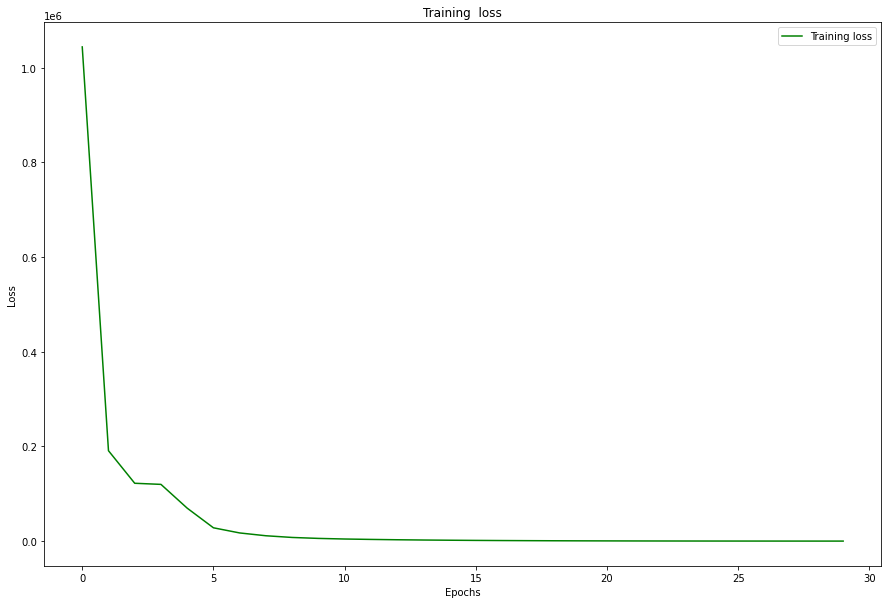

In [659]:
import matplotlib.pyplot as plt
epochs = range(0,num_epochs)
plt.plot(epochs, torch.tensor(loss_lst).detach().numpy(), 'g', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5. Model Performance Evaluation and Validation 

# Model evaluation with regression evaluation metrics

Mean absolute error
MAE(y_true,y_pred) = 1/n * ∑|(y_true−y_pred)

Mean squared error
MSE(y_true,y_pred) = 1/n * ∑(y_true−y_pred) **2

Root Mean Squared Error
RMSE = sqrt(MSE)


In [664]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def EvaluateNNModel(input_data,target_data):
    input_data = torch.from_numpy(input_data.values).float()
    targets = torch.from_numpy(target_data.values).float()
    targets = targets.unsqueeze(1)

    with torch.no_grad():
        prediction = model(input_data)
        
    print("MAE",mean_absolute_error(prediction,target_data))
    print("MSE",mean_squared_error(target_data, prediction, squared=False))
    print("RMSE",mean_squared_error(target_data, prediction))
    print("R^2 score",r2_score(target_data, prediction))
    return targets, prediction

In [665]:
target_train, prediction_train = EvaluateNNModel(x_train,y_train) 

MAE 0.10962003259654264
MSE 0.19388635600340964
RMSE 0.03759191904428091
R^2 score 0.9991922094364303


In [666]:
target_test, prediction_test = EvaluateNNModel(x_test,y_test) 

MAE 0.10977196608012667
MSE 0.2031102640700617
RMSE 0.04125377937061019
R^2 score 0.9990996799551998


In [667]:
print("Actual values")
target_test.reshape(target_test.shape[0])[:100]

Actual values


tensor([28.8400, 31.6500, 31.7400,  8.5500, 26.4200, 26.8400, 30.3200, 21.9300,
        41.4100, 29.2100, 29.0100, 24.6200, 22.9800, 23.7100, 27.6200, 23.7400,
        28.7400, 21.6700, 21.0400, 29.7400, 31.0900, 23.6600, 35.5900, 32.4200,
        28.4500, 36.1100, 29.3600, 34.6500, 30.6200, 47.2800, 36.4700, 25.4000,
        27.5900, 11.4900, 28.0100, 47.9000, 43.2100, 26.5000, 34.2900, 32.9300,
        33.5200, 25.9800, 37.0000, 22.9100, 32.2800, 32.4000, 16.2800, 24.5400,
        29.6600, 26.9600, 29.8200, 27.9900, 25.9800, 32.3800, 37.0100, 26.8800,
        29.8400, 30.6200, 29.1600, 22.5800, 30.9700, 28.9700, 32.1800, 27.1900,
        29.6200, 23.3100, 21.2400, 33.1300, 31.7600, 27.5200, 35.1600, 36.7100,
        21.9200, 38.6000, 28.1500, 20.7100, 26.2900, 36.8000, 26.5600, 20.8700,
        31.5100, 34.3500, 28.3300, 24.4500, 28.2000, 40.3000, 27.9500, 28.9600,
        28.1000, 31.1500, 24.6300, 23.7900, 32.2800, 28.4200, 33.6400, 32.3900,
        25.5900, 28.2900, 27.0100, 25.74

In [668]:
print("Predicted values")
prediction_test.reshape(prediction_test.shape[0])[:100]

Predicted values


tensor([28.7344, 31.5422, 31.8335,  8.1872, 26.2747, 26.6982, 30.2838, 21.8926,
        41.5229, 29.2762, 29.0914, 24.5195, 22.9408, 23.5740, 27.4985, 23.7458,
        28.7782, 21.3301, 20.9383, 29.7069, 31.0978, 23.4390, 35.6871, 32.1832,
        28.4526, 36.1815, 29.3338, 34.6168, 30.6376, 47.1150, 36.5042, 25.3235,
        27.6111, 11.3013, 28.0735, 47.3278, 43.3149, 26.3461, 34.2229, 32.6505,
        33.4688, 25.8489, 36.9395, 22.9253, 32.0985, 32.5287, 16.8014, 24.9153,
        29.6923, 26.8654, 29.6716, 27.7983, 25.9498, 32.4509, 37.0676, 26.7677,
        29.7732, 30.6420, 29.2189, 22.6206, 31.0223, 29.0592, 32.3367, 27.0644,
        29.4807, 23.2108, 21.2107, 32.9888, 31.7201, 27.5593, 35.2401, 36.7211,
        22.0049, 38.6215, 28.0525, 20.7164, 26.1208, 36.6725, 26.4191, 20.6566,
        31.4886, 34.4382, 28.2192, 24.3432, 28.3063, 40.4608, 27.8979, 28.9910,
        28.1087, 30.9992, 24.6928, 23.7349, 32.1580, 28.4080, 33.5336, 32.3687,
        25.4785, 28.1079, 26.9207, 25.66

# Model2 Decision tree with good result


criterion='squared_error', splitter='best', max_depth=25, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=25, min_impurity_decrease=0.0, ccp_alpha=0.0)

In [669]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeModel = DecisionTreeRegressor() # criterion='mse'
# mean absolute error
DecisionTreeModel = DecisionTreeRegressor(max_depth=25) 
DecisionTreeModel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=25)

In [672]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def EvaluateTreeModel(input_data,target_data):
    prediction = DecisionTreeModel.predict(input_data)
    targets = target_data.values
    print("MAE",mean_absolute_error(target_data,prediction))
    print("MSE",mean_squared_error(target_data, prediction, squared=False))
    print("RMSE",mean_squared_error(target_data, prediction))
    print("R^2 score",r2_score(target_data, prediction))
    return targets, prediction

In [673]:
target_train, prediction_train = EvaluateTreeModel(x_train,y_train)

MAE 0.03960292736592786
MSE 0.13972983363610245
RMSE 0.01952442640797287
R^2 score 0.9995804511232084


In [674]:
target_test, prediction_test = EvaluateTreeModel(x_test,y_test)

MAE 0.672907754458728
MSE 1.406694283915183
RMSE 1.9787888083996494
R^2 score 0.9568150299000804


In [676]:
print("Actual values")
target_test.reshape(target_test.shape[0])[:100]

Actual values


array([28.84, 31.65, 31.74,  8.55, 26.42, 26.84, 30.32, 21.93, 41.41,
       29.21, 29.01, 24.62, 22.98, 23.71, 27.62, 23.74, 28.74, 21.67,
       21.04, 29.74, 31.09, 23.66, 35.59, 32.42, 28.45, 36.11, 29.36,
       34.65, 30.62, 47.28, 36.47, 25.4 , 27.59, 11.49, 28.01, 47.9 ,
       43.21, 26.5 , 34.29, 32.93, 33.52, 25.98, 37.  , 22.91, 32.28,
       32.4 , 16.28, 24.54, 29.66, 26.96, 29.82, 27.99, 25.98, 32.38,
       37.01, 26.88, 29.84, 30.62, 29.16, 22.58, 30.97, 28.97, 32.18,
       27.19, 29.62, 23.31, 21.24, 33.13, 31.76, 27.52, 35.16, 36.71,
       21.92, 38.6 , 28.15, 20.71, 26.29, 36.8 , 26.56, 20.87, 31.51,
       34.35, 28.33, 24.45, 28.2 , 40.3 , 27.95, 28.96, 28.1 , 31.15,
       24.63, 23.79, 32.28, 28.42, 33.64, 32.39, 25.59, 28.29, 27.01,
       25.74])

In [677]:
print("Predicted values")
prediction_test.reshape(prediction_test.shape[0])[:100]

Predicted values


array([28.9       , 31.65      , 32.37      ,  9.76      , 26.7       ,
       26.57      , 30.92      , 22.70545455, 41.02      , 29.34      ,
       29.35      , 24.77166667, 22.98      , 23.71      , 27.62      ,
       24.51      , 28.57725   , 23.41      , 22.0825    , 28.69666667,
       30.74666667, 23.76      , 35.62      , 32.41      , 28.64      ,
       36.61      , 28.99      , 34.78      , 32.17      , 48.66      ,
       36.47      , 26.01      , 26.39111111, 13.98      , 28.        ,
       49.37      , 41.57      , 26.5       , 35.27      , 32.5       ,
       33.307     , 27.06      , 37.29      , 22.925     , 32.31      ,
       32.02      , 17.47285714, 26.52      , 27.57666667, 27.26      ,
       29.9       , 27.91      , 25.51      , 33.72      , 36.47      ,
       26.88      , 32.08      , 30.7825    , 29.11      , 22.04      ,
       32.37      , 29.03      , 31.94      , 27.2875    , 29.63      ,
       23.02589286, 24.27      , 32.7       , 31.72      , 27.39

# K fold cross validation for decision tree regressor(k=5)

In [678]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    #_scoring = ['accuracy', 'precision', 'recall', 'f1']
    _scoring= ["neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error","r2"]

    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Training Mean absolute Error": results['train_neg_mean_absolute_error'],
              "Mean Training Accuracy": results['train_neg_mean_absolute_error'].mean()*100,
              "Training mean squared error": results['train_neg_mean_squared_error'],
              "Mean Training mean squared error": results['train_neg_mean_squared_error'].mean(),
              "Training  root mean squared error": results['train_neg_root_mean_squared_error'],
              "Mean Training  root mean squared error": results['train_neg_root_mean_squared_error'].mean(),
              "Training R2 scores": results['train_r2'],
              "Mean Training R2 Score": results['train_r2'].mean(),
            
            "Validation Mean absolute Error": results['test_neg_mean_absolute_error'],
              "Mean Validation Accuracy": results['test_neg_mean_absolute_error'].mean()*100,
              "Validation mean squared error": results['test_neg_mean_squared_error'],
              "Mean Validation mean squared error": results['test_neg_mean_squared_error'].mean(),
              "Validation  root mean squared error": results['test_neg_root_mean_squared_error'],
              "Mean Validation  root mean squared error": results['test_neg_root_mean_squared_error'].mean(),
              "Validation R2 scores": results['test_r2'],
              "Mean Validation R2 Score": results['test_r2'].mean(),
            
              }

In [679]:
cross_validation(DecisionTreeModel,input_dataframe, target_dataframe)

{'Training Mean absolute Error': array([-0.04317529, -0.10490932, -0.07326631, -0.03699589, -0.092199  ]),
 'Mean Training Accuracy': -7.010916090352662,
 'Training mean squared error': array([-0.02405056, -0.0882775 , -0.06070743, -0.01551594, -0.07848084]),
 'Mean Training mean squared error': -0.053406455028072244,
 'Training  root mean squared error': array([-0.15508244, -0.29711529, -0.24638877, -0.12456302, -0.28014433]),
 'Mean Training  root mean squared error': -0.2206587690237567,
 'Training R2 scores': array([0.99940799, 0.99807557, 0.99874623, 0.99969475, 0.99821496]),
 'Mean Training R2 Score': 0.9988279012421535,
 'Validation Mean absolute Error': array([-1.69108201, -1.27679984, -1.19767508, -1.09987428, -1.71128169]),
 'Mean Validation Accuracy': -139.53425807375467,
 'Validation mean squared error': array([-7.10207629, -4.31313535, -6.76500424, -4.57643391, -8.14344139]),
 'Mean Validation mean squared error': -6.180018234600823,
 'Validation  root mean squared error':

# Another Decision tree model with visualization

criterion='squared_error', splitter='random', max_depth=3, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=25, min_impurity_decrease=0.0, ccp_alpha=0.0)

In [680]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeModel = DecisionTreeRegressor() # criterion='mse'
# mean absolute error
DecisionTreeModel = DecisionTreeRegressor(splitter='random',max_depth=3,random_state=None,)
DecisionTreeModel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, splitter='random')

In [681]:
target_train1, prediction_train1 = EvaluateTreeModel(x_train,y_train)

MAE 3.969714793413773
MSE 5.441455162956183
RMSE 29.609434290462506
R^2 score 0.3637403404625583


In [682]:
target_test1, prediction_test1 = EvaluateTreeModel(x_test,y_test)

MAE 3.999168180342433
MSE 5.5579522260192125
RMSE 30.89083294671192
R^2 score 0.32584028598571924


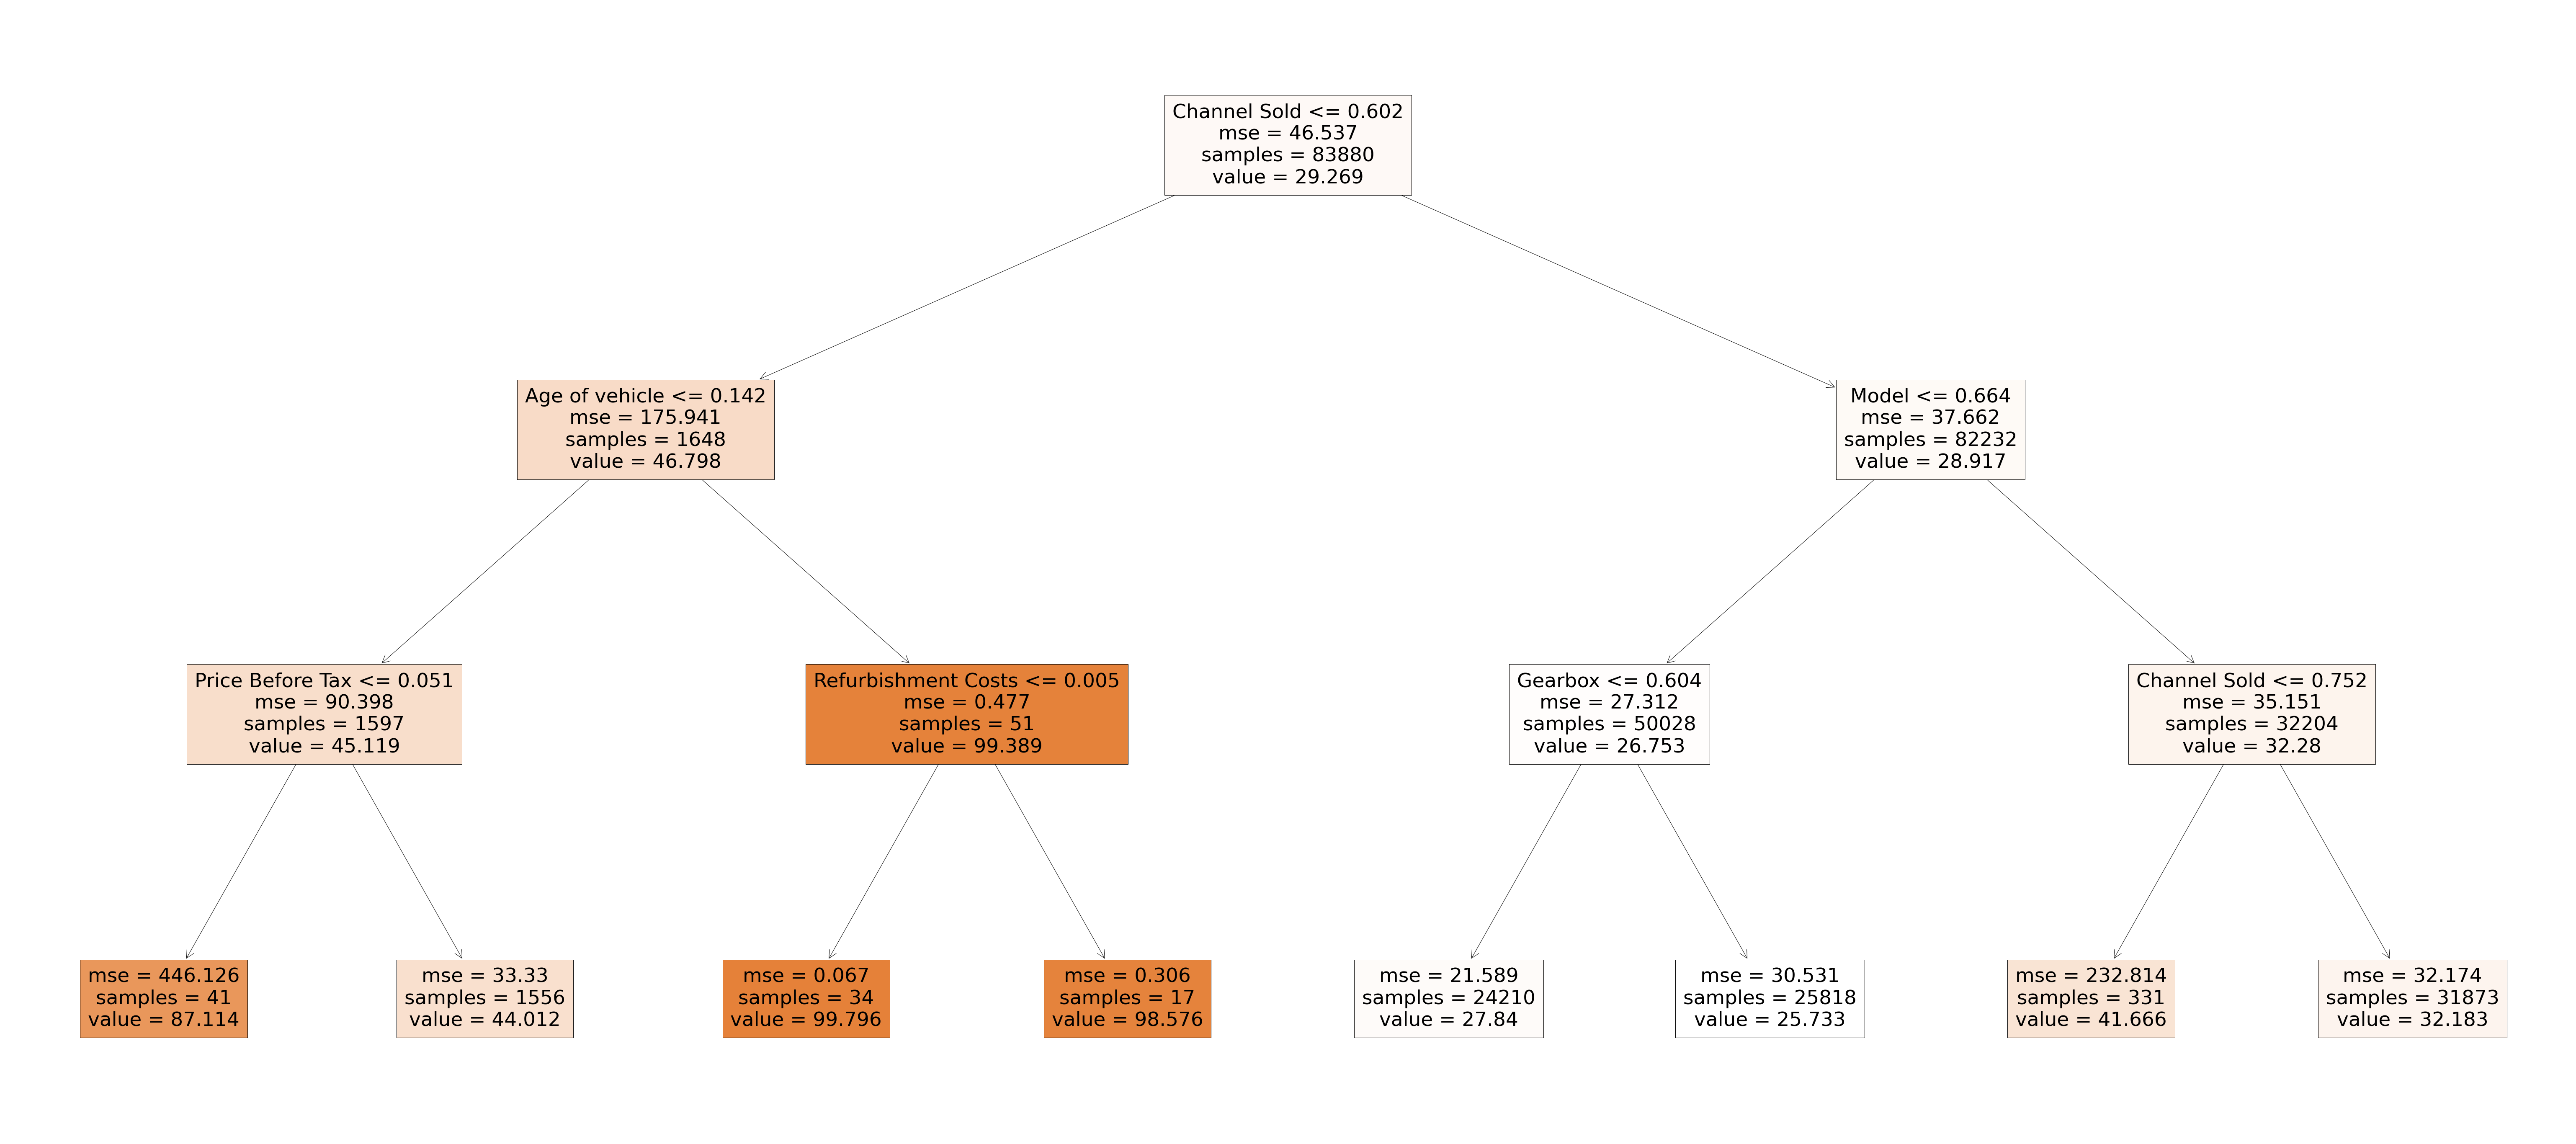

In [683]:
fig = plt.figure(figsize=(110,50))
_ = tree.plot_tree(DecisionTreeModel, feature_names=x_train.columns, filled=True)

# Model3 LightGBM Regressor

In [684]:
import lightgbm as ltb
model = ltb.LGBMRegressor()


In [685]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def EvaluateLGBMModel(input_data,target_data):
    prediction = LGBM.predict(input_data)
    targets = target_data.values
    print("MAE",mean_absolute_error(target_data,prediction))
    print("MSE",mean_squared_error(target_data, prediction, squared=False))
    print("RMSE",mean_squared_error(target_data, prediction))
    print("R^2 score",r2_score(target_data, prediction))
    return targets, prediction

In [686]:
target_train, prediction_train = EvaluateTreeModel(x_train,y_train)

MAE 3.969714793413773
MSE 5.441455162956183
RMSE 29.609434290462506
R^2 score 0.3637403404625583


In [687]:
target_test, prediction_test = EvaluateTreeModel(x_test,y_test)

MAE 3.999168180342433
MSE 5.5579522260192125
RMSE 30.89083294671192
R^2 score 0.32584028598571924


In [689]:
print("Actual values")
target_test.reshape(target_test.shape[0])[:100]

Actual values


array([28.84, 31.65, 31.74,  8.55, 26.42, 26.84, 30.32, 21.93, 41.41,
       29.21, 29.01, 24.62, 22.98, 23.71, 27.62, 23.74, 28.74, 21.67,
       21.04, 29.74, 31.09, 23.66, 35.59, 32.42, 28.45, 36.11, 29.36,
       34.65, 30.62, 47.28, 36.47, 25.4 , 27.59, 11.49, 28.01, 47.9 ,
       43.21, 26.5 , 34.29, 32.93, 33.52, 25.98, 37.  , 22.91, 32.28,
       32.4 , 16.28, 24.54, 29.66, 26.96, 29.82, 27.99, 25.98, 32.38,
       37.01, 26.88, 29.84, 30.62, 29.16, 22.58, 30.97, 28.97, 32.18,
       27.19, 29.62, 23.31, 21.24, 33.13, 31.76, 27.52, 35.16, 36.71,
       21.92, 38.6 , 28.15, 20.71, 26.29, 36.8 , 26.56, 20.87, 31.51,
       34.35, 28.33, 24.45, 28.2 , 40.3 , 27.95, 28.96, 28.1 , 31.15,
       24.63, 23.79, 32.28, 28.42, 33.64, 32.39, 25.59, 28.29, 27.01,
       25.74])

In [690]:
print("Predicted values")
prediction_test.reshape(prediction_test.shape[0])[:100]

Predicted values


array([27.84001115, 27.84001115, 32.1827139 , 25.73320087, 27.84001115,
       27.84001115, 27.84001115, 25.73320087, 32.1827139 , 25.73320087,
       32.1827139 , 25.73320087, 25.73320087, 27.84001115, 27.84001115,
       25.73320087, 25.73320087, 27.84001115, 25.73320087, 32.1827139 ,
       32.1827139 , 27.84001115, 32.1827139 , 27.84001115, 27.84001115,
       32.1827139 , 25.73320087, 32.1827139 , 27.84001115, 27.84001115,
       25.73320087, 27.84001115, 25.73320087, 25.73320087, 32.1827139 ,
       32.1827139 , 32.1827139 , 27.84001115, 32.1827139 , 27.84001115,
       32.1827139 , 27.84001115, 32.1827139 , 25.73320087, 27.84001115,
       25.73320087, 25.73320087, 25.73320087, 25.73320087, 27.84001115,
       27.84001115, 32.1827139 , 27.84001115, 32.1827139 , 32.1827139 ,
       27.84001115, 32.1827139 , 32.1827139 , 25.73320087, 25.73320087,
       32.1827139 , 32.1827139 , 32.1827139 , 27.84001115, 27.84001115,
       27.84001115, 27.84001115, 27.84001115, 25.73320087, 25.73